# Recursion

*Recursive* functions are functions that call themselves.  Anything you can do with recursion, you could instead do with a loop, but sometimes recursion is more convenient.  This is because data structures are often recursive.  Data structures are recursive when objects of a given type contain references to other objects of the same type.  For example, you could have dicts containing other dicts (which in turn contain other dicts).  It would be possible, but quite difficult to write code to search through the following structure 

In [1]:
d = {"A": 10, "B": {"C": {"F": 4, "G": 55}, "D": 3, "E": {"H": 11, "I": {}}}}
d

{'A': 10, 'B': {'C': {'F': 4, 'G': 55}, 'D': 3, 'E': {'H': 11, 'I': {}}}}

Spend a couple minutes thinking: how would you write some code to check if 5 is contained anywhere in that nested structure, using loops?

It's actually quite tricky, and we won't attempt it here.  Instead, we'll introduce a simple recursive solution later in this reading.

## Loops vs. Recursion

Recursion and iteration (loops) are equally powerful (you can solve the same problems with either one or the other).  However, one approach is typically simpler or more efficient, so it's useful to know both.

Let's look at the following code using a loop, and think about how we could make it recursive.

In [2]:
for i in range(5):
    print("$" * (i+1))

$
$$
$$$
$$$$
$$$$$


Printing a dollar triangle as above is well suited to loops.  It's only two lines of code!  The recursive solution in this case is more complicated, but let's try it as a mental exercise.

Here's a key observation before we can develop a recursive approach: the problem of creating a triangle of width 5 characters (at the base) can be divided into two smaller problems:

(1) Draw a triangle of size 4, like this:

```
$
$$
$$$
$$$$
```

(2) Draw a line of size 5, like this:

```
$$$$$
```

Note the recursive definition: to draw a triangle, we need to draw a triangle (albeit of a smaller size).  Of course, we can skip drawing a smaller triangle if we're trying to draw a "triangle" of size one.  The case where we can skip the recursive sub problem is called the *base case*.

Let's create a recursive function that draws the triangle:

In [3]:
#dollars0.png 4 1 c,dollars1.png 2 3 c,dollars2.png 2 6 c,dollars3.png 5 2 c,dollars4.png 5 4 c
def dollar_triangle(width):
    if width > 1:
        dollar_triangle(width - 1) # problem 1
    print("$" * width)             # problem 2

dollar_triangle(5)

$
$$
$$$
$$$$
$$$$$


A moment before `dollar_triangle` calls itself for the first time, the process looks like this:

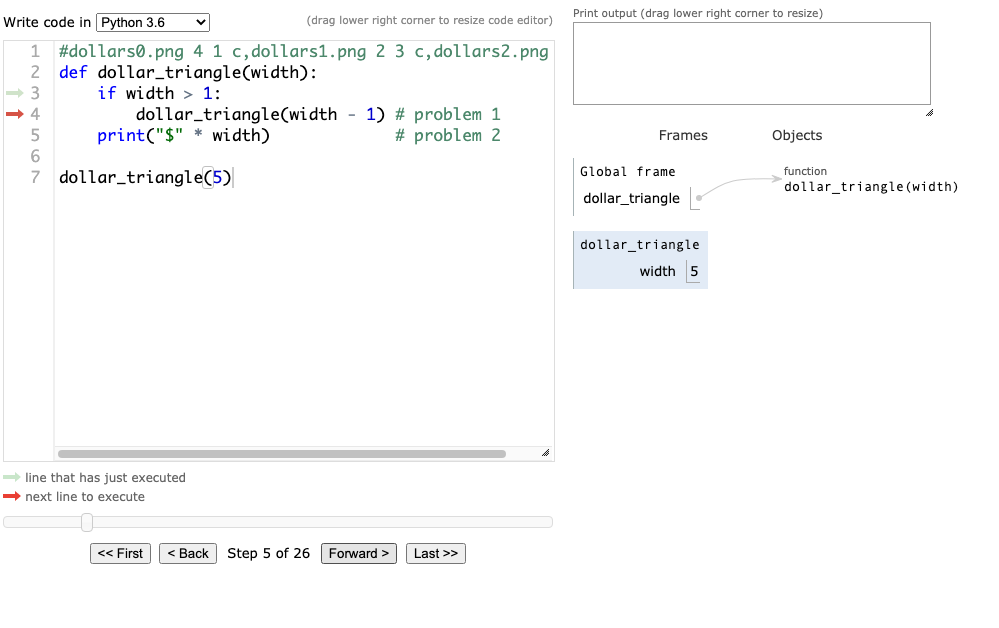

In [4]:
from IPython.core.display import Image
Image("dollars0.png")

Notice that there is one stack frame for `dollar_triangle` on the right (the blue box with `width=5`).  A moment after that first call to itself, the process looks like this:

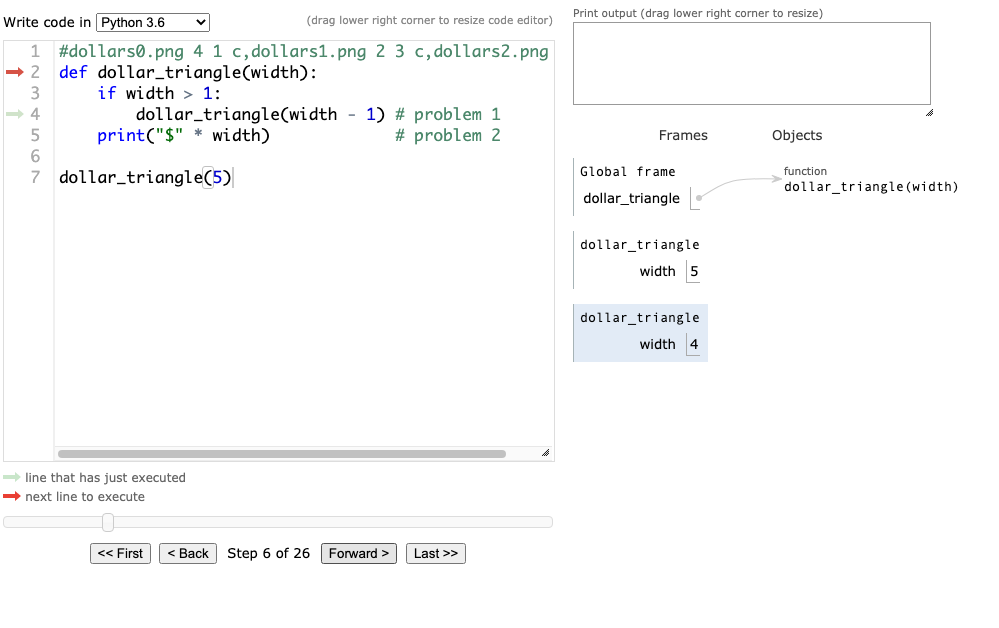

In [5]:
Image("dollars1.png")

Note now how there are two stack frames for `dollar_triangle`.  The blue one (that was called with width=4) is active, meaning that as the instruction pointer (the red arrow on the left) runs over code, any reference to the variable `width` will find 4 in the active frame (in contrast to 5 in the inactive frame).

The fact that the width=4 frame is currently active means we're currently drawing a triangle of size 4.  However, the other frame (the one that was called with width=5) is waiting for it's turn to run again.  We'll need to go back to that eventually.  After we draw a triangle of size 4, we need to draw a `$$$$$` at the bottom to make it a triangle of size 5.

Drawing a triangle of size 4 involves drawing a triangle of size 3, before completing the job by drawing `$$$$`.  Thus, the width=4 frame will need to wait too (as will the other frames).  Eventually, it looks like this, with five frames for the same function:

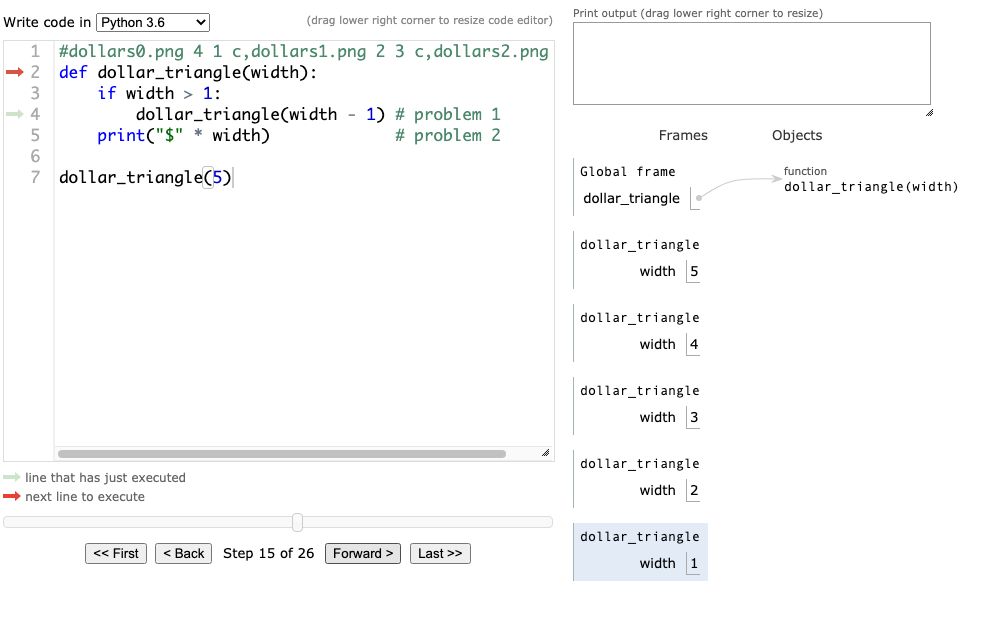

In [6]:
Image("dollars2.png")

At this point, we've hit the base case.  It's no longer true that `width > 1`, so we won't make recursive calls.  We'll just print our own line, then return, giving the function invocation that called us a chance to run again and wrap up its own work.

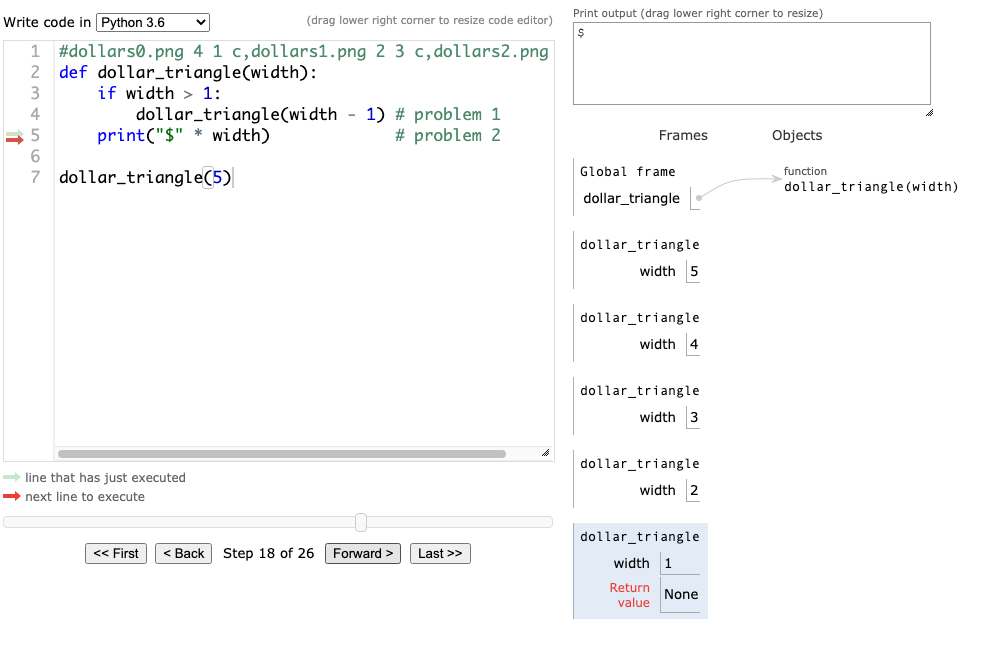

In [7]:
Image("dollars3.png")

Above, we see the invocation with width=1 return; that frame will go away, and the width=2 frame will become active again, as seen below:

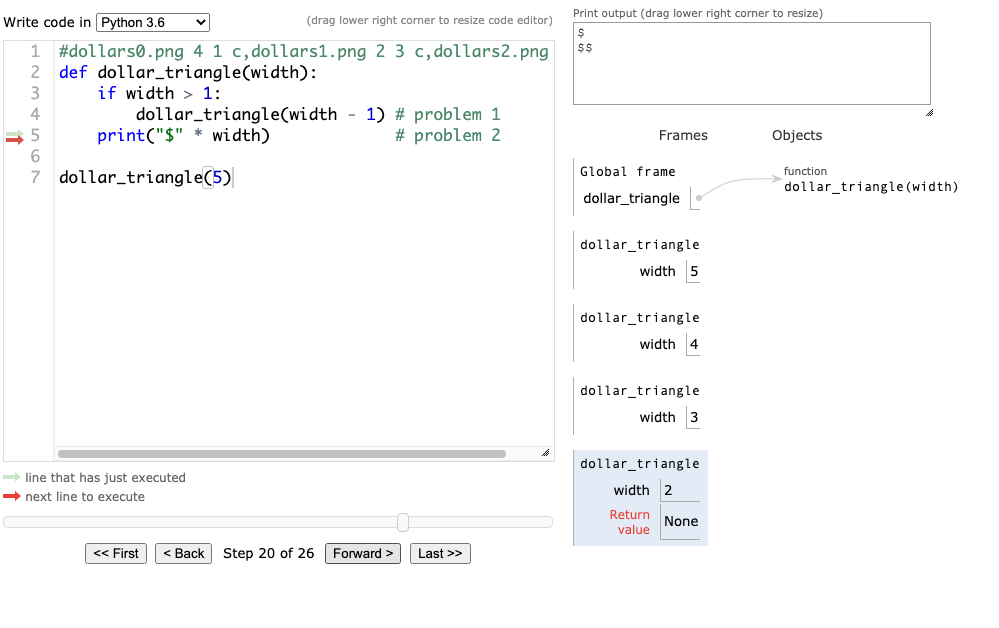

In [8]:
Image("dollars4.png")

The stack frames will continue to unwind, until we've printed the whole triangle.

## Recursive Search

Ok, although the above example was doable with recursion, that was only an academic exercises -- loops were the better option.

Let's revisit our original motivation.  How can we check if 5 is somewhere in the nested dictionary?

In [9]:
d = {"A": 10, "B": {"C": {"F": 4, "G": 55}, "D": 3, "E": {"H": 11, "I": {}}}}
d

{'A': 10, 'B': {'C': {'F': 4, 'G': 55}, 'D': 3, 'E': {'H': 11, 'I': {}}}}

First, note that `d` has two values.

In [10]:
for v in d.values():
    print(v)

10
{'C': {'F': 4, 'G': 55}, 'D': 3, 'E': {'H': 11, 'I': {}}}


Thus, the question "does d contain a value x" can be broken into two sub questions:

1. is 10 equal to x?
2. does the following dictionary (the second value in d) contain x?  `{'C': {'F': 4, 'G': 55}, 'D': 3, 'E': {'H': 11, 'I': {}}}`

If the answer to either of those sub questions is "yes", then the answer to the original question is also "yes".  And again we see the recursion.  To see if x is in d, we need to determine if x is in the smaller dictionary, `{'C': {'F': 4, 'G': 55}, 'D': 3, 'E': {'H': 11, 'I': {}}}`.

In [11]:
#contains.png 9 2 c
def contains(subdict, x):
    for v in subdict.values():
        if type(v) != dict:
            if v == x:
                return True
        else:
            if contains(v, x):
                return True
    return False

d = {"A": 10, "B": {"C": {"F": 4, "G": 55}, "D": 3, "E": {"H": 11, "I": {}}}}
contains(d, 4)

True

Take some time to study the below snapshot of the execution of the above code.  Note how the first (inactive) frame has `subdict` pointing to the same dict as `d` (the A/B dict).  The second (active) frame has `subdict` pointing to the dictionary nested inside the one `d` points to (the C/D/E dict).

At this point in time, the `contains` call for C/D/E has already made recursive calls and discovered 4, so it is returning True on line 9.  Although no arrow shows it, the `contains` call for A/B is waiting on line 8 for this return.  Once that happens, the `contains` call for A/B will progress to line 9 as well, also returning True.  If C/D/E contains 4, then A/B must as well, for A/B contains the C/D/E dict.

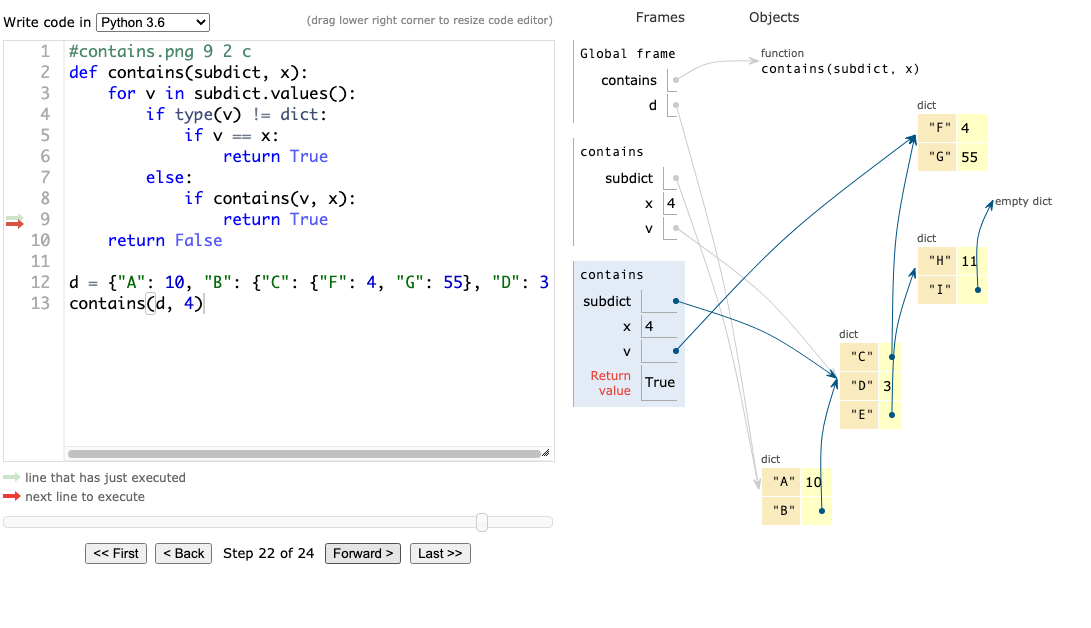

In [12]:
Image("contains.png")

## Conclusion

Frames are the key to understanding recursive calls.  If we have multiple invocations of the same function outstanding, frames let us keep different local variables for each invocation.

Recursion is a natural solution when it is easy to break a big problem into smaller, but similar problems.  This happens regularly with data structures.  We can often accomplish something with a data structure by doing something to all the values in that data structure (when those values are themselves data structures, we find ourselves doing recursion).